In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree

import SweetSpotPrediction as ssp

# 03 Exploration of models
Try out a few models see which one works
*Note: Run 01 to build the .csv files needed*

In [2]:
df = pd.read_csv('ClassificationData.csv')

In [3]:
features = [
    #'XPos', # propbably dont want these as features
    #'YPos', # propbably dont want these as features
    'Thickness',
    'AvgNTG',
    'AvgPerm',
    'AvgPoro',
    'NetPerm',

]

label_cls = 'WellPresent' 


In [4]:
df.dropna(inplace=True)

In [5]:
X_train, X_, y_train, y_ = train_test_split(df[features], df[label_cls], test_size=0.33, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_, y_, test_size=0.50, random_state=42)

# Normalization and other preprocessing

In [6]:
preprocessing = StandardScaler()
X_train = preprocessing.fit_transform(X_train)
X_test = preprocessing.transform(X_test)
X_val = preprocessing.transform(X_val)
X_train[:5]

array([[ 1.65014232,  0.18231105, -0.16373121,  0.7286982 ,  0.3948424 ],
       [ 1.04073621, -0.32438038, -0.1754074 ,  0.31141331,  2.7195599 ],
       [-0.22082252, -0.02677682, -0.37602856, -0.93338002, -0.05879958],
       [ 0.04493207, -1.23242817,  1.86304624,  0.09908652, -0.96789496],
       [ 0.4751954 , -0.98980224,  0.27746817,  0.04990199,  0.9685945 ]])

In [7]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
    
classifiers = [
    AdaBoostClassifier(),
    DecisionTreeClassifier(class_weight='balanced'),
    GradientBoostingClassifier(),
    GaussianNB(),
    KNeighborsClassifier(2),
    #NuSVC(probability=True),
    LinearDiscriminantAnalysis(),
    MLPClassifier(),
    QuadraticDiscriminantAnalysis(),
    RandomForestClassifier(),
    SVC(kernel="rbf", C=0.025, probability=True),
    ]

In [8]:
from sklearn.linear_model import LogisticRegression

regressors = [
    LogisticRegression
]

In [9]:
for index, clf in enumerate(classifiers):
    print(f"Model {index}: {clf}")
    clf.fit(X_train, y_train)
    y_pred_val = clf.predict(X_val)
    ssp.ReportMetrics(clf, X_train, X_val, y_train, y_val, y_pred_val)
    print(f"-------------------------------------------------------------------")

Model 0: AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Precision: 0.000
Recall: 0.000
F1: 0.000
-------------------------------------------------------------------
Model 1: DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Precision: 0.000
Recall: 0.000
F1: 0.000
-------------------------------------------------------------------
Model 2: GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Precision: 0.000
Recall: 0.000
F1: 0.000
-------------------------------------------------------------------
Model 3: GaussianNB(priors=None, var_smoothing=1e-09)
Precision: 0.000
Recall: 0.000
F1: 0.000
-------------------------------------------------------------------
Model 4: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')
Precision: 0.000
Recall: 0.000
F1: 0.000
-------------------------------------------------------------------
Model 5: LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)
Precision: 0.000
Recall: 0.000
F1: 0.000
-------------------------------------------------------------------
Model 6: MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learnin

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\discriminant_analysis.py:686: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', avera

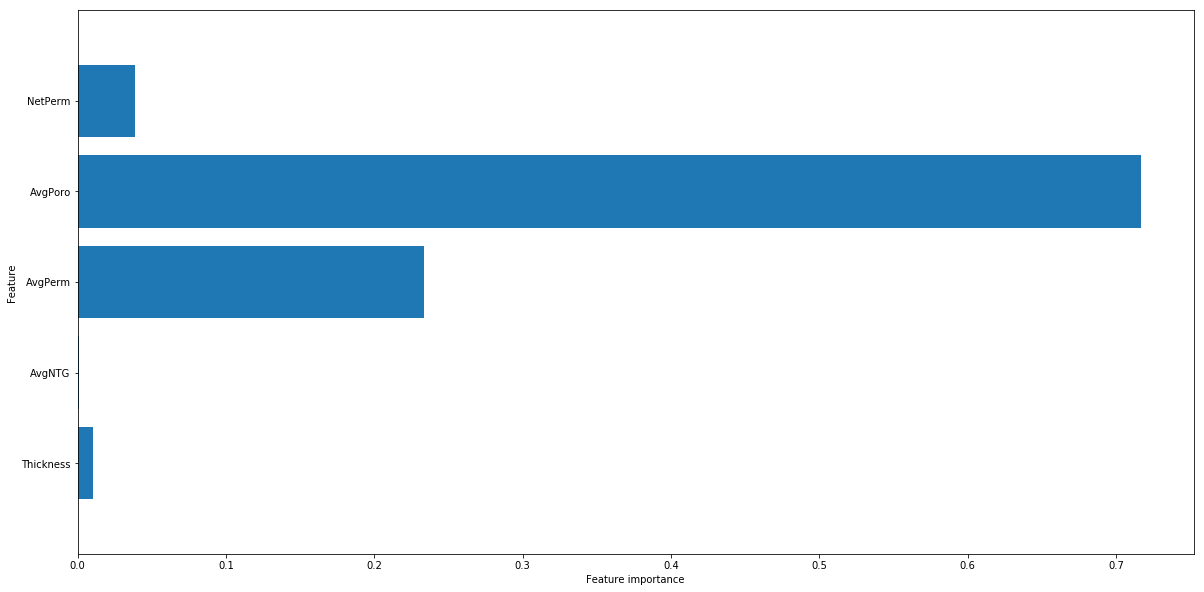

In [10]:
bestModel = classifiers[1]
ssp.plot_feature_importances(bestModel,features)

# <a href="02 Base Model.ipynb">Previous</a> <a href="04 Classification model.ipynb">Next</a> Notebook